In [1]:
import pylab as pb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from math import pi
from scipy.spatial.distance import cdist
%matplotlib inline

sns.set(style='ticks')
savefig = False

### Generate data

In [2]:
X = np.linspace(-1, 1, 100 * (2) + 1)
tn = []
sigma = 0.05
w = np.array([[-1.5, 0.5]])
for x in X:
    tn.append((np.dot(w, np.array([[1, x]]).T) + np.random.normal(0, sigma))[0][0])

### Visualize the data

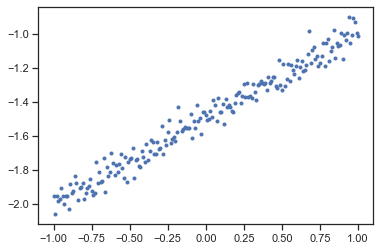

In [3]:
plt.plot(X, tn, '.')

### Set the prior

In [4]:
m = [0, 0] # Mean vector
s = np.identity(2) # Covariance matrix

### Visualize the prior

In [5]:
data = np.random.multivariate_normal(m, s, 1000000)
pxs, pys = data.T

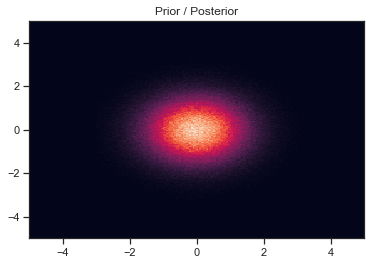

In [6]:
r = 5
bins = 200
plt.hist2d(pxs, pys, bins, range=np.array([(-r, r), (-r, r)]))
plt.title("Prior / Posterior")
if savefig:
    plt.savefig("prior_visualized")

### Sample lines from the prior

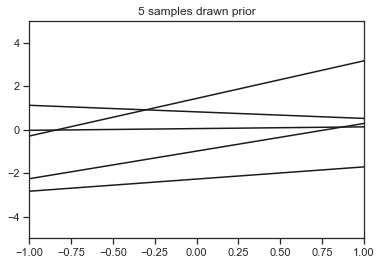

In [7]:
data = np.random.multivariate_normal(m, s, 5)
for i in range(len(data)):
    w0, w1 = data[i][0], data[i][1]
    tmp = list(map(lambda x : w0 + w1 * x, X))
    plt.plot(X, tmp, 'k')
plt.axis([-1, 1, -5, 5])
plt.title("5 samples drawn prior")
if savefig:
    plt.savefig("samples_1")

In [8]:
def posterior(alpha, beta, SN, x, t):
    s = np.linalg.inv(alpha * np.identity(2) + beta * np.dot(x.T , x))
    m = beta * np.dot(s, np.dot(x.T, t))
    m = np.reshape(m, (1, 2))[0]
    return m, s

def sample(X, tn, currentX, currentT):
    i = np.random.choice(range(0, 201))
    currentX = np.vstack([currentX, [1, X[i]]])
    currentT = np.vstack([currentT, [tn[i]]])
    return currentX, currentT

In [10]:
x = np.empty((0, 2))
t = np.empty((0, 1))
for i in range(50):
    x, t = sample(X, tn, x, t)
    m, s = posterior(1, 1/sigma, s, x, t)
    data = np.random.multivariate_normal(m, s, 1000000)
    pxs, pys = data.T
    plt.hist2d(pxs, pys, bins, range=np.array([(-r, r), (-r, r)]))
    plt.title("Prior / Posterior, iteration: " + str(i))
    plt.savefig("posterior_" + str(i) + ".png")
    plt.close()
    data = np.random.multivariate_normal(m, s, 5)
    for j in range(len(data)):
        w0, w1 = data[j][0], data[j][1]
        tmp = list(map(lambda x : w0 + w1 * x, X))
        plt.plot(X, tmp, 'k')

    for row in zip(x, t):
        plt.plot(row[0][1], row[1][0], 'or', markersize=14)

    plt.axis([-1, 1, -5, 5])
    plt.title("5 samples drawn posterior, iteration: " + str(i))
    plt.savefig("samples_2_" + str(i) + ".png")
    plt.close()
    

### 1. Pick a single data point (x,t) and visualise the posterior distribution over W.

In [93]:
x = np.empty((0, 2))
t = np.empty((0, 1))
x, t = sample(X, tn, x, t)

### With this new point, calculate the posterior and visualize it

In [101]:
m, s = posterior(1, 1/sigma, s, x, t)
data = np.random.multivariate_normal(m, s, 1000000)
pxs, pys = data.T

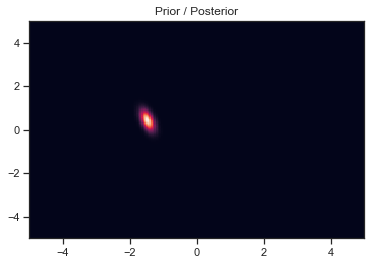

In [102]:
plt.hist2d(pxs, pys, bins, range=np.array([(-r, r), (-r, r)]))
plt.title("Prior / Posterior")
if savefig:
    plt.savefig("posterior_visualized_1")

### Sample lines from this new "prior"

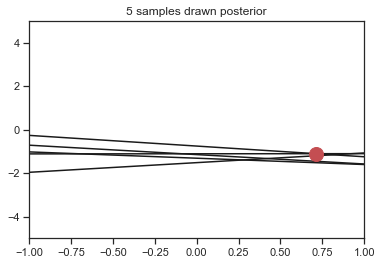

In [96]:
data = np.random.multivariate_normal(m, s, 5)
for i in range(len(data)):
    w0, w1 = data[i][0], data[i][1]
    tmp = list(map(lambda x : w0 + w1 * x, X))
    plt.plot(X, tmp, 'k')

for row in zip(x, t):
    plt.plot(row[0][1], row[1][0], 'or', markersize=14)
    
plt.axis([-1, 1, -5, 5])
plt.title("5 samples drawn posterior")
if savefig:
    plt.savefig("samples_2")

### 2. Add a second data point (x,t) and visualise the posterior distribution over W.

In [97]:
x, t = sample(X, tn, x, t)

m, s = posterior(1, 1/sigma, s, x, t)

### 3. Add a third data point (x,t) and visualise the posterior distribution over W.

In [100]:
x, t = sample(X, tn, x, t)

m, s = posterior(1, 1/sigma, s, x, t)

### 4. Add a fourth data point (x,t) and visualise the posterior distribution over W.

In [79]:
x, t = sample(X, tn, x, t)

m, s = posterior(1, 1/sigma, s, x, t)

### 5. Add a fifth data point (x,t) and visualise the posterior distribution over W.

In [80]:
x, t = sample(X, tn, x, t)

m, s = posterior(1, 1/sigma, s, x, t)

### 6. Add a sixth data point (x,t) and visualise the posterior distribution over W.

In [81]:
x, t = sample(X, tn, x, t)

m, s = posterior(1, 1/sigma, s, x, t)

### 7. Add a seventh data point (x,t) and visualise the posterior distribution over W.

In [82]:
x, t = sample(X, tn, x, t)

m, s = posterior(1, 1/sigma, s, x, t)

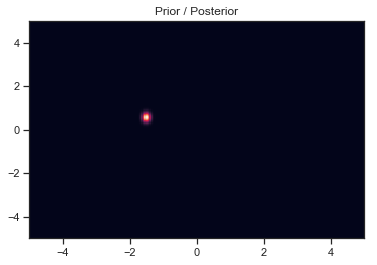

In [83]:
data = np.random.multivariate_normal(m, s, 1000000)
pxs, pys = data.T

plt.hist2d(pxs, pys, bins, range=np.array([(-r, r), (-r, r)]))
plt.title("Prior / Posterior")
if savefig:
    plt.savefig("posterior_visualized_2")

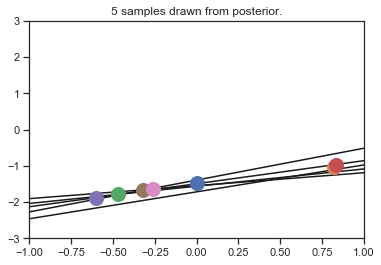

In [84]:
data = np.random.multivariate_normal(m, s, 5)
for i in range(len(data)):
    w0, w1 = data[i][0], data[i][1]
    tmp = list(map(lambda x : w0 + w1 * x, X))
    plt.plot(X, tmp, 'k')

for row in zip(x, t):
    plt.plot(row[0][1], row[1][0], 'o', markersize=14)

plt.axis([-1, 1, -3, 3])
plt.title("5 samples drawn from posterior.")
if savefig:
    plt.savefig("samples_3")